# Lesson 2: Exercises

## Load CADETSettings

This imports all the standard libraries and provides some helper functions.

In [1]:
%run ../utils.ipynb

## Model templates

Again, we start with defining a function that creates a pre-configured model model to reduce the amount of required typing.

In [2]:
# Do not delete!
def create_cstr_template(c_init=0, V=1, Q=1):
    if isinstance(c_init, (float, int)):
        c_init = [c_init]
    n_comp = len(c_init)
    
    model = get_cadet_template(n_units=3)
    
    # Inlet
    model.root.input.model.unit_000.unit_type = 'INLET'
    model.root.input.model.unit_000.ncomp = n_comp
    model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'
    
    # CSTR
    model.root.input.model.unit_001.unit_type = 'CSTR'
    model.root.input.model.unit_001.ncomp = n_comp
    model.root.input.model.unit_001.init_volume = V
    model.root.input.model.unit_001.init_c = c_init
    
    # Outlet
    model.root.input.model.unit_002.unit_type = 'OUTLET'
    model.root.input.model.unit_002.ncomp = n_comp
    
    model.root.input.model.connections.nswitches = 1
    model.root.input.model.connections.switch_000.section = 0
    model.root.input.model.connections.switch_000.connections = [
        0, 1, -1, -1, Q,
        1, 2, -1, -1, Q,
    ]
    
    return model

def plot_cstr_results(model):
    time = model.root.output.solution.solution_times
    c = model.root.output.solution.unit_001.solution_inlet
    plt.plot(time, c)
    plt.title('CSTR (Inlet)')
    plt.xlabel('$time~/~min$')
    plt.ylabel('$concentration~/~mol \cdot L^{-1} $')
    plt.show()

    time = model.root.output.solution.solution_times
    c = model.root.output.solution.unit_001.solution_outlet
    plt.plot(time, c)
    plt.title('CSTR (Outlet)')
    plt.xlabel('$time~/~min$')
    plt.ylabel('$concentration~/~mol \cdot L^{-1} $')
    plt.show()

In [3]:
# Do not delete!
def create_column_template(c_init=0, length=1, tau=1, Q=1):
    if isinstance(c_init, (float, int)):
        c_init = [c_init]
    n_comp = len(c_init)
    
    model = get_cadet_template(n_units=3)
    
    # Inlet
    model.root.input.model.unit_000.unit_type = 'INLET'
    model.root.input.model.unit_000.ncomp = n_comp
    model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'
    
    # Tubular reactor
    model.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITHOUT_PORES'
    model.root.input.model.unit_001.ncomp = n_comp
    model.root.input.model.unit_001.col_length = length
    model.root.input.model.unit_001.velocity = length/tau
    model.root.input.model.unit_001.total_porosity = 1
    model.root.input.model.unit_001.col_dispersion = 0
    model.root.input.model.unit_001.init_c = c_init

    # Outlet
    model.root.input.model.unit_002.unit_type = 'OUTLET'
    model.root.input.model.unit_002.ncomp = n_comp
    
    model.root.input.model.connections.nswitches = 1
    model.root.input.model.connections.switch_000.section = 0
    model.root.input.model.connections.switch_000.connections = [
        0, 1, -1, -1, Q,
        1, 2, -1, -1, Q,
    ]
    
    
    set_discretization(model)
    
    return model

def plot_column_results(model):
    time = model.root.output.solution.solution_times
    c = model.root.output.solution.unit_000.solution_outlet
    plt.plot(time, c)
    plt.title('Column (Inlet)')
    plt.xlabel('$time~/~min$')
    plt.ylabel('$concentration~/~mol \cdot L^{-1} $')
    plt.show()

    time = model.root.output.solution.solution_times
    c = model.root.output.solution.unit_001.solution_outlet
    plt.plot(time, c)
    plt.title('Column (Outlet)')
    plt.xlabel('$time~/~min$')
    plt.ylabel('$concentration~/~mol \cdot L^{-1} $')
    plt.show()

## Exercise 1: Step function in CSTR

Analyze how the concentration profile of a `CSTR` reacts to a step function:

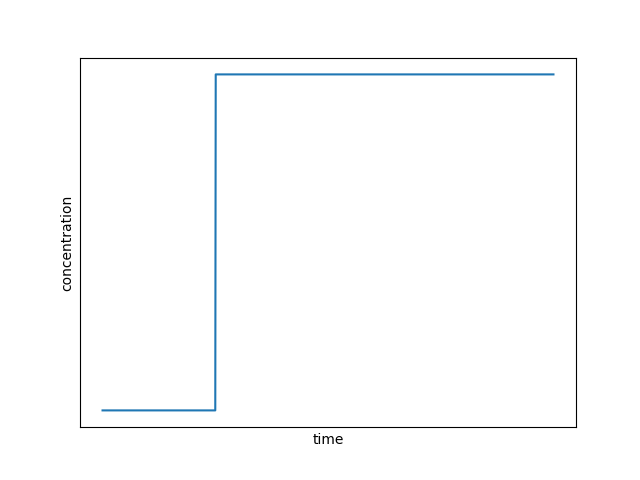

***Hint:*** Always check the input arguments of our model template functions.

Simulation completed successfully


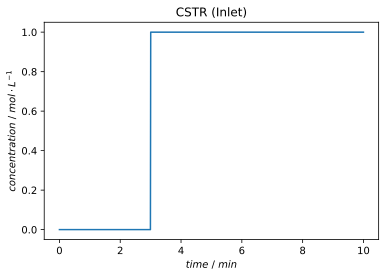

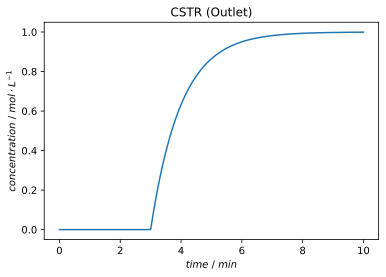

In [4]:
# Auxiliary variables
c_step = [1]
c_init = [0]

Q = 1
V = 1
t_cycle = 10

model = create_cstr_template(c_init, V, Q)

model.root.input.model.unit_000.sec_000.const_coeff = 0
model.root.input.model.unit_000.sec_001.const_coeff = c_step

model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1000)

## Sections and Switches
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, t_cycle*0.3, t_cycle]
model.root.input.solver.sections.section_continuity = [0]

run_simulation(model)
plot_cstr_results(model)

## Exercise 2: Step function in Tubular reactor

Also analyze the system behaviour of a Tubular reactor for different input profiles (see Exercise 1)

Simulation completed successfully


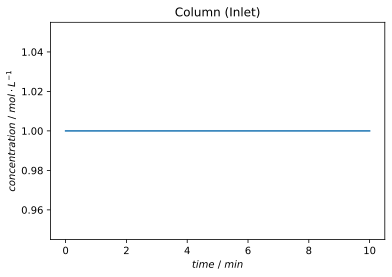

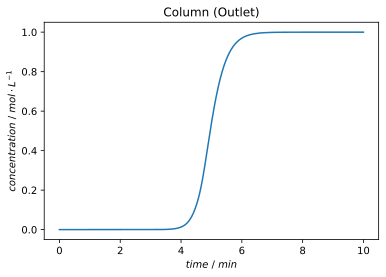

In [5]:
# Auxiliary variables
n_comp = 1
tau = 5
length = 1
c_step = [1]
c_init = [0]

t_cycle = 10

model = create_column_template(c_init, length, tau)

model.root.input.model.unit_000.sec_000.const_coeff = [1]
model.root.input.model.unit_000.sec_000.lin_coeff = [0]

## Sections and Switches
model.root.input.solver.sections.nsec = 2
model.root.input.solver.sections.section_times = [0.0, t_cycle]
model.root.input.solver.sections.section_continuity = []

model.root.input.solver.user_solution_times = np.linspace(0, t_cycle, 1001)

run_simulation(model)
plot_column_results(model)

## Bonus Exercise
Many systems can be modelled by a chain of unit operations.

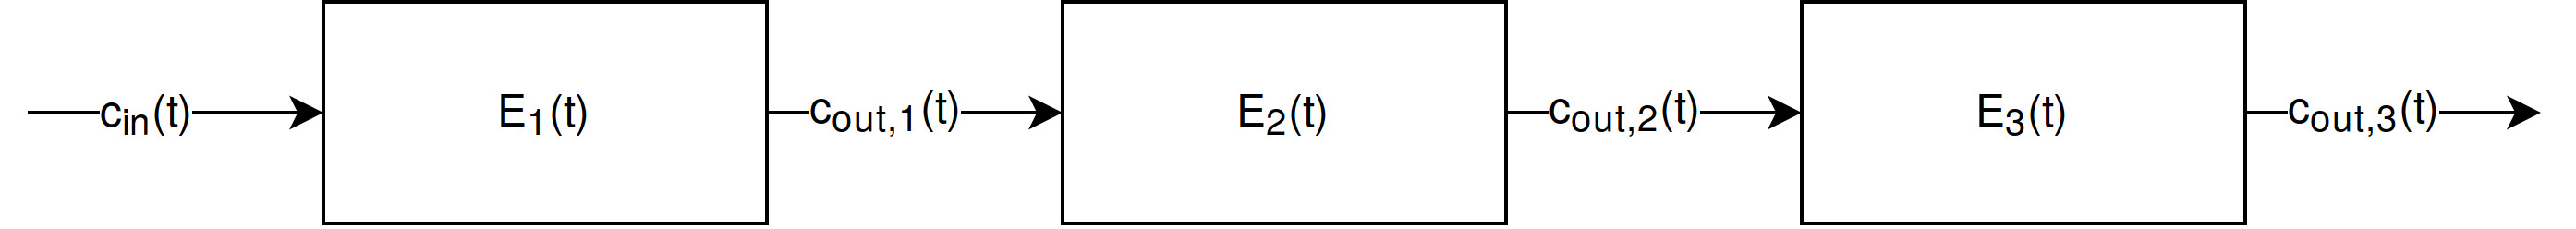

Try connecting combining both the CSTR with a Tubular reactor and analyze the behavior.